# Linear Regression

Nesta seção, você vai usar a regressão linear para prever a expectativa de vida a partir do índice de massa corporal (IMC). Antes de fazer isso, vamos dar uma olhada nas ferramentas necessárias para construir esse modelo.

Para seu modelo de regressão linear, você usará a classe **LinearRegression** do scikit-learn. Essa classe fornece a função **fit()** para ajustar o modelo a seus dados.

## Structure linear regression model:

1. imports
2. Load dataset
3. Analyse database
4. Choose the independent and dependent variables
5. Split the data into training/testing sets
6. Create linear regression model
7. Train the model using the training sets
8. Make predictions using the testing sets
9. Make predictions using the values that are not yet in the database.

** Antes de começar entenda o problema **

### 1. Imports

In [9]:
# Data analysis and data wrangling
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LinearRegression

# Other
from IPython.display import Image
import configparser
import subprocess
import warnings
import pprint
import time
import os

In [10]:
import os


def prepare_directory_work(end_directory: str='notebooks'):
    # Current path
    curr_dir = os.path.dirname (os.path.realpath ("__file__")) 
    
    if curr_dir.endswith(end_directory):
        os.chdir('..')
        return curr_dir
    
    return f'Current working directory: {curr_dir}'

In [11]:
prepare_directory_work(end_directory='notebooks')

'Current working directory: /home/campos/projects/artificial_inteligence/machine_learning/supervised_learning/linear_regression'

### 2. Load dataset

* Os dados estão em um arquivo chamado "bmi_and_life_expectancy.csv".
* Use o read_csv do pandas para carregar os dados em um dataframe
* Atribua o dataframe à variável bmi_life_data.

In [14]:
%%time

bmi_life_data = pd.read_csv('data/raw/life_expectancy.csv',
                    sep=',',
                    encoding='utf-8')

bmi_life_data.columns

CPU times: user 0 ns, sys: 3.75 ms, total: 3.75 ms
Wall time: 2.93 ms


Index(['Country', 'Life expectancy ', ' BMI '], dtype='object')

### 3. Data analysis 

In [15]:
bmi_life_data.head()

,Country,Life expectancy,BMI
0,Afghanistan,65.0,19.1
1,Afghanistan,59.9,18.6
2,Afghanistan,59.9,18.1
3,Afghanistan,59.5,17.6
4,Afghanistan,59.2,17.2


In [16]:
# rows and columns

bmi_life_data.shape

(2938, 3)

In [17]:
# name collumns

bmi_life_data.keys()

Index(['Country', 'Life expectancy ', ' BMI '], dtype='object')

In [18]:
#Type dataset

type(bmi_life_data)

pandas.core.frame.DataFrame

In [19]:
#Types data in collumns

bmi_life_data.dtypes

Country              object
Life expectancy     float64
 BMI                float64
dtype: object

In [20]:
# Type dataset(type())
# rows and columns (shape)
# name collumns (keys)
# Types data in collumns (dtypes)

bmi_life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 3 columns):
Country             2938 non-null object
Life expectancy     2928 non-null float64
 BMI                2904 non-null float64
dtypes: float64(2), object(1)
memory usage: 69.0+ KB


O arquivo de dados é "bmi_and_life_expectancy.csv". Ele inclui três colunas, contendo os seguintes dados:

* **Country** – O país em que a pessoa nasceu.
* **Life expectancy** – A expectativa de vida média ao nascer para uma pessoa nesse país.
* **BMI** – O IMC médio para homens nesse país

In [21]:
bmi_life_data.describe()

,Life expectancy,BMI
count,2928.000000,2904.000000
mean,69.224932,38.321247
std,9.523867,20.044034
min,36.300000,1.000000
25%,63.100000,19.300000
50%,72.100000,43.500000
75%,75.700000,56.200000
max,89.000000,87.300000


In [22]:
bmi_life_data.describe(include=['O'])

,Country
count,2938
unique,193
top,Kuwait
freq,16


### 4. Choosing the independent and dependent variables  

In [27]:
# escolhendo as variáveis independentes
X = bmi_life_data[[" BMI "]] 

# escolhendo a variável dependente (é a variável que quero fazer a predição, target)
y = bmi_life_data['Life expectancy ']

### 5. Split the data into training/testing sets

In [28]:
from sklearn.model_selection import train_test_split

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(
                                    X, 
                                    y, 
                                    test_size=0.25)

print(f"X_train:\n{X_train.head()}\n")
print(f"y_train:\n{y_train.head()}\n")
print(f"X_test:\n{X_test.head()}\n")
print(f"y_test:\n{y_test.head()}")

X_train:
       BMI 
611    25.6
332    49.4
946    36.3
774    54.7
2623    2.9

y_train:
611     63.7
332     75.2
946     66.0
774     73.1
2623    56.7
Name: Life expectancy , dtype: float64

X_test:
       BMI 
517     2.2
1691   57.9
1546   57.9
1789   17.0
104    49.7

y_test:
517     49.2
1691    76.0
1546    79.7
1789    64.2
104     73.5
Name: Life expectancy , dtype: float64


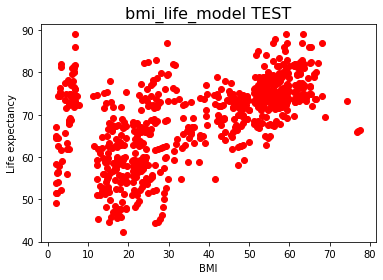

In [29]:
import matplotlib.pyplot as plt

# now we are going to plot the points
plt.scatter(X_test, y_test, color='red')
plt.title('bmi_life_model TEST', fontsize=16)
plt.xlabel("BMI")
plt.ylabel("Life expectancy")
plt.draw()

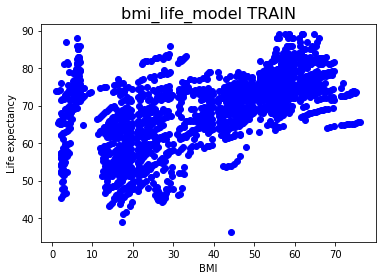

In [30]:
import matplotlib.pyplot as plt

# now we are going to plot the points and the model obtained
plt.scatter(X_train, y_train, color='blue')  # you can use test_data_X and test_data_Y instead.
plt.title('bmi_life_model TRAIN', fontsize=16)
plt.xlabel("BMI")
plt.ylabel("Life expectancy")
plt.draw()

### 6. Create linear regression model

Crie um modelo de regressão usando o método **LinearRegression()** do scikit-learn.
Ajuste o modelo aos dados com o metodo **fit(x, y)**

In [31]:
# Make a model
model = LinearRegression()

### 7. Train the model using the training sets

In [33]:
# train the model
model = model.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Finalmente, com o modelo treinado, podemos realizar previsões e ver quão próximas elas estão da realidade.

Podemos fazer previsões com os **dados de teste** ou senão com algum valor do eixo X (IMC).

### 8.  Make predictions using the testing set
Lembre: você esta fazendo predições para o eixo y (variável DEPENDENTE)

In [125]:
y_pred_model = model.predict(X_test)

### 9. Make predictions using values that are not yet in the database
Faça uma previsão usando um IMC de 21.07931 e atribua o resultado à variável laos_life_exp.

In [124]:
# Make a prediction using the model
# TODO: Predict life expectancy for a BMI (IMC) value of 21.07931

laos_life_exp = model.predict(21.07931)
print(f'The Predict life expectancy to Laos is: {laos_life_exp} years.')

The Predict life expectancy to Laos is: [60.16356403] years.
